In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
batting = pd.read_csv("/content/batting_summary.csv")
bowling = pd.read_csv("/content/bowling_summary.csv")
matches = pd.read_csv("/content/match_schedule_results.csv")
players = pd.read_csv("/content/world_cup_players_info.csv")

In [ ]:
print(batting.head())
print(bowling.head())
print(matches.head())
print(players.head())

   Match_no           Match_Between Team_Innings    Batsman_Name  \
0         1  England vs New Zealand      England  Jonny Bairstow   
1         1  England vs New Zealand      England     Dawid Malan   
2         1  England vs New Zealand      England        Joe Root   
3         1  England vs New Zealand      England     Harry Brook   
4         1  England vs New Zealand      England       Moeen Ali   

   Batting_Position                            Dismissal  Runs  Balls  4s  6s  \
0                 1  c Daryl Mitchell b Mitchell Santner    33     35   4   1   
1                 2            c Tom Latham b Matt Henry    14     24   2   0   
2                 3                     b Glenn Phillips    77     86   4   1   
3                 4     c Devon Conway b Rachin Ravindra    25     16   4   1   
4                 5                     b Glenn Phillips    11     17   1   0   

  Strike_Rate  
0      94.300  
1      58.300  
2      89.500  
3     156.300  
4      64.700  
   Match

In [ ]:
batting.info()
bowling.info()
matches.info()
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Match_no          916 non-null    int64 
 1   Match_Between     916 non-null    object
 2   Team_Innings      916 non-null    object
 3   Batsman_Name      916 non-null    object
 4   Batting_Position  916 non-null    int64 
 5   Dismissal         914 non-null    object
 6   Runs              916 non-null    int64 
 7   Balls             916 non-null    int64 
 8   4s                916 non-null    int64 
 9   6s                916 non-null    int64 
 10  Strike_Rate       916 non-null    object
dtypes: int64(6), object(5)
memory usage: 78.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Match_no       574 non-null    int64  
 1   Match

Data Cleaning

In [ ]:
batting.drop_duplicates(inplace=True)
bowling.drop_duplicates(inplace=True)
matches.drop_duplicates(inplace=True)
players.drop_duplicates(inplace=True)

In [ ]:
batting.fillna(0, inplace=True)
bowling.fillna(0, inplace=True)
matches.fillna("Unknown", inplace=True)
players.fillna("Unknown", inplace=True)

In [ ]:
matches['Date'] = pd.to_datetime(matches['Date'], errors='coerce')

/tmp/ipython-input-222/3096306363.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  matches['Date'] = pd.to_datetime(matches['Date'], errors='coerce')


Top Scorer in Each Match

In [ ]:
top_scorers = batting.loc[
    batting.groupby('Match_no')['Runs'].idxmax()
]

top_scorers[['Match_no','Batsman_Name','Runs']]

,Match_no,Batsman_Name,Runs
11,1,Devon Conway,152
17,2,Mohammad Rizwan,68
50,3,Najmul Hossain Shanto,59
55,4,Rassie van der Dussen,108
86,5,KL Rahul,97
89,6,Will Young,70
109,7,Dawid Malan,140
143,8,Mohammad Rizwan,131
156,9,Rohit Sharma,131
160,10,Quinton de Kock,109


In [ ]:
px.bar(
    top_scorers,
    x="Batsman_Name",
    y="Runs",
    title="Top Scorer Per Match"
)

Best Bowler Per Match

In [ ]:
best_bowlers = bowling.loc[
    bowling.groupby('Match_no')['Wickets'].idxmax()
]

best_bowlers[['Match_no','Bowler_Name','Wickets']]

,Match_no,Bowler_Name,Wickets
1,1,Matt Henry,3
16,2,Bas de Leede,4
29,3,Shakib Al Hasan,3
48,4,Gerald Coetzee,3
54,5,Ravindra Jadeja,3
70,6,Mitchell Santner,5
77,7,Mahedi Hasan,4
87,8,Hasan Ali,4
99,9,Jasprit Bumrah,4
120,10,Kagiso Rabada,3


In [ ]:
px.bar(
    best_bowlers,
    x="Bowler_Name",
    y="Wickets",
    title="Best Bowler Per Match"
)

Team Winning Analysis

In [ ]:
team_wins = matches['Winner'].value_counts()

team_wins

,count
Winner,
Australia,9
India,9
South Africa,7
New Zealand,5
Pakistan,4
Afghanistan,4
Sri Lanka,3
England,3
Bangladesh,2


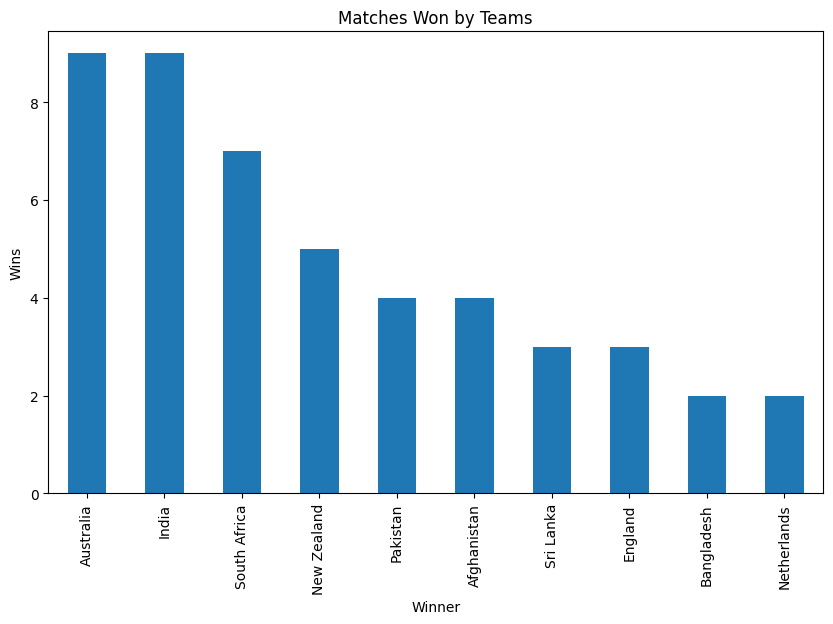

In [ ]:
team_wins.plot(kind='bar')
plt.title("Matches Won by Teams")
plt.ylabel("Wins")
plt.show()

Stadium Analysis

In [ ]:
venue_wins = matches.groupby(
    ['Venue','Winner']
).size().reset_index(name='Wins')

venue_wins.head()

,Venue,Winner,Wins
0,Ahmedabad,Australia,2
1,Ahmedabad,India,1
2,Ahmedabad,New Zealand,1
3,Ahmedabad,South Africa,1
4,Bengaluru,Australia,1


In [ ]:
px.bar(
    venue_wins,
    x="Venue",
    y="Wins",
    color="Winner",
    title="Team Wins Across Stadiums"
)

Merge Player Role Info

In [ ]:
batting_players = pd.merge(
    top_scorers,
    players,
    left_on="Batsman_Name",
    right_on="player_name",
    how="left"
)

Player Role Contribution

In [ ]:
role_analysis = batting_players['playingRole'].value_counts()

role_analysis

,count
playingRole,
Top order Batter,18
Wicketkeeper Batter,11
Allrounder,8
Opening Batter,6
Batting Allrounder,3
,1
Middle order Batter,1


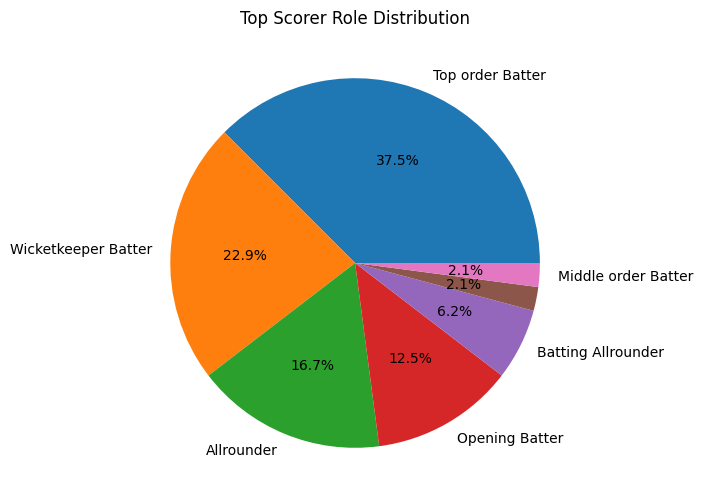

In [ ]:
plt.pie(
    role_analysis,
    labels=role_analysis.index,
    autopct='%1.1f%%'
)
plt.title("Top Scorer Role Distribution")
plt.show()

Venue vs Team Heatmap

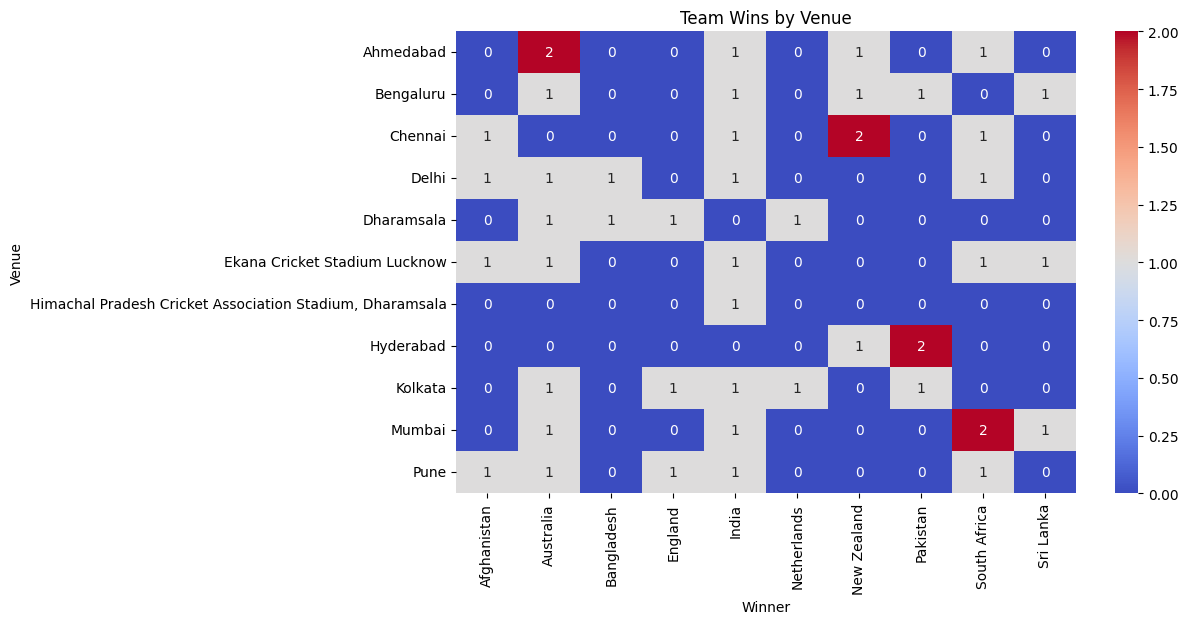

In [ ]:
heatmap_data = pd.crosstab(
    matches['Venue'],
    matches['Winner']
)

sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
plt.title("Team Wins by Venue")
plt.show()

Top Scorers Frequency Visualization

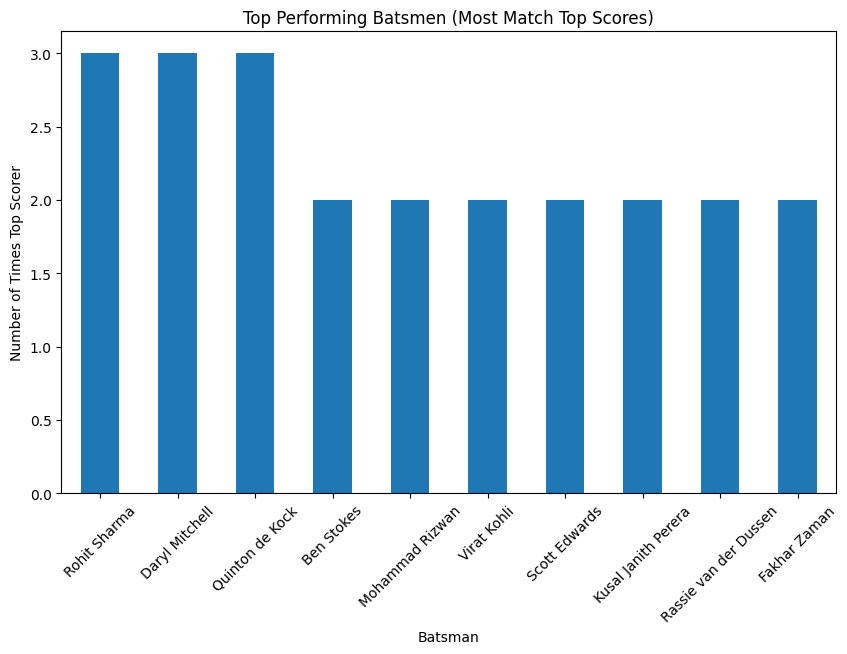

In [ ]:
top_scorer_freq = top_scorers['Batsman_Name'].value_counts().head(10)

plt.figure()
top_scorer_freq.plot(kind='bar')

plt.title("Top Performing Batsmen (Most Match Top Scores)")
plt.xlabel("Batsman")
plt.ylabel("Number of Times Top Scorer")
plt.xticks(rotation=45)

plt.show()

Best Bowler Frequency Visualization

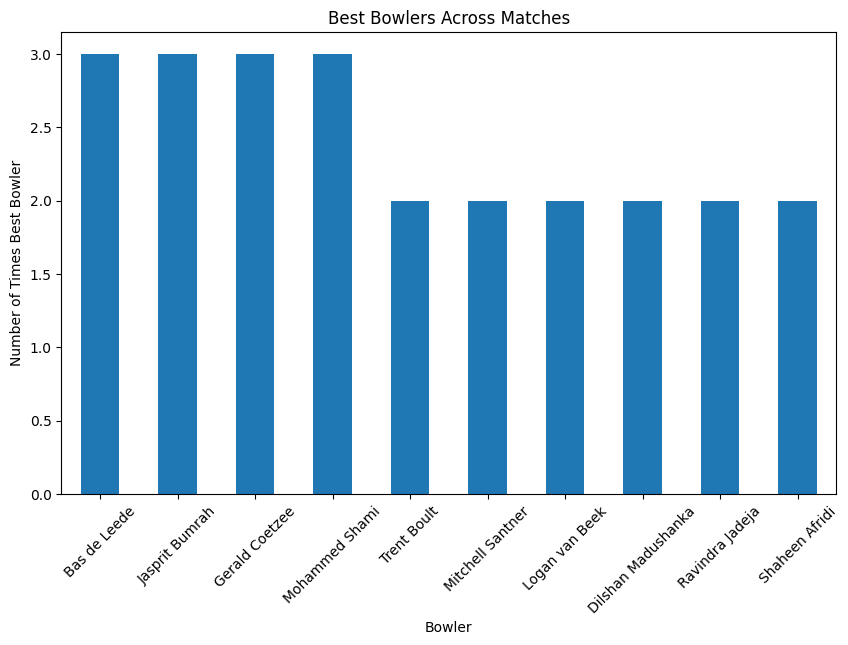

In [ ]:
best_bowler_freq = best_bowlers['Bowler_Name'].value_counts().head(10)

plt.figure()
best_bowler_freq.plot(kind='bar')

plt.title("Best Bowlers Across Matches")
plt.xlabel("Bowler")
plt.ylabel("Number of Times Best Bowler")
plt.xticks(rotation=45)

plt.show()

Top Winning Teams Visualization

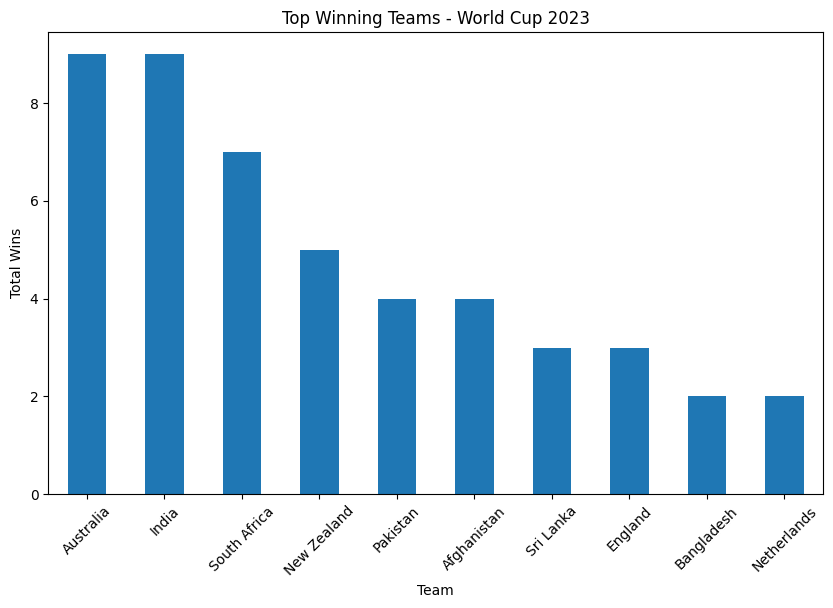

In [ ]:
plt.figure()
team_wins.head(10).plot(kind='bar')

plt.title("Top Winning Teams - World Cup 2023")
plt.xlabel("Team")
plt.ylabel("Total Wins")

plt.xticks(rotation=45)
plt.show()